# 실전 데이터 시각화

분석할 데이터를 읽고, matplotlib, seaborn, bokeh 등의 시각화 라이브러리를 사용하여 다양한 시각화 만들기

## 데이터 파일 읽기

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/도로교통공단_가해운전자 연령층별 월별 교통사고(2019).csv',encoding='cp949') #cp949 와 utf-8의 차이점?
data

,가해자연령층,월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,20세이하,01월,423,10,134,371,88
1,20세이하,02월,405,6,128,397,81
2,20세이하,03월,569,13,197,535,97
3,20세이하,04월,595,11,175,578,117
4,20세이하,05월,714,9,210,661,142
...,...,...,...,...,...,...,...
91,불명,08월,318,0,44,234,91
92,불명,09월,376,0,50,237,125
93,불명,10월,391,0,65,277,90
94,불명,11월,432,0,53,331,99


## 다양한 데이터 시각화

In [5]:
accident = pd.DataFrame(data=data)
accident = accident.iloc[:,0:4]
accident['사망비율'] = accident.사망자수 / accident.사고건수
accident.dropna(how='all')
accident

,가해자연령층,월,사고건수,사망자수,사망비율
0,20세이하,01월,423,10,0.023641
1,20세이하,02월,405,6,0.014815
2,20세이하,03월,569,13,0.022847
3,20세이하,04월,595,11,0.018487
4,20세이하,05월,714,9,0.012605
...,...,...,...,...,...
91,불명,08월,318,0,0.000000
92,불명,09월,376,0,0.000000
93,불명,10월,391,0,0.000000
94,불명,11월,432,0,0.000000


In [6]:
a = pd.DataFrame({'age' : accident.가해자연령층,
                  'month' : accident.월,
                  'number_total' : accident.사고건수,
                  'number_death' : accident.사망자수})
a

,age,month,number_total,number_death
0,20세이하,01월,423,10
1,20세이하,02월,405,6
2,20세이하,03월,569,13
3,20세이하,04월,595,11
4,20세이하,05월,714,9
...,...,...,...,...
91,불명,08월,318,0
92,불명,09월,376,0
93,불명,10월,391,0
94,불명,11월,432,0


In [ ]:
from google.colab import files
upload = files.upload()

Saving gulim.ttc to gulim.ttc


In [ ]:
!kls

drive  gulim.ttc  sample_data


In [11]:
!apt install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [10]:
from matplotlib import font_manager
for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


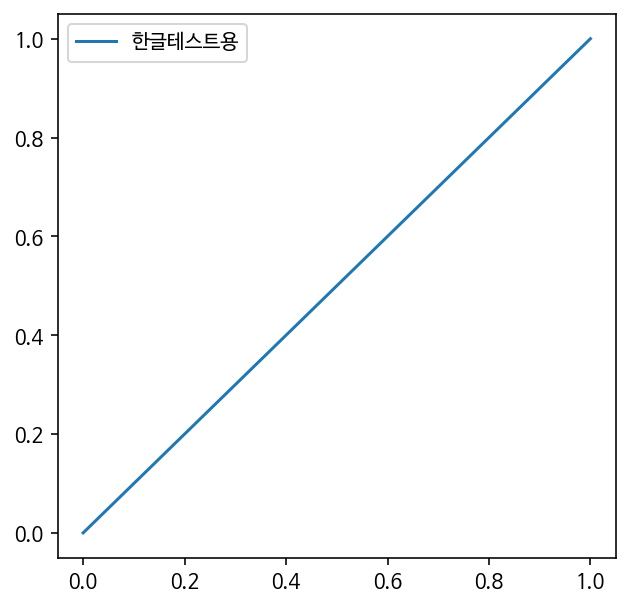

In [2]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],label='한글테스트용')
plt.legend()
plt.show()

<Figure size 1440x288 with 0 Axes>

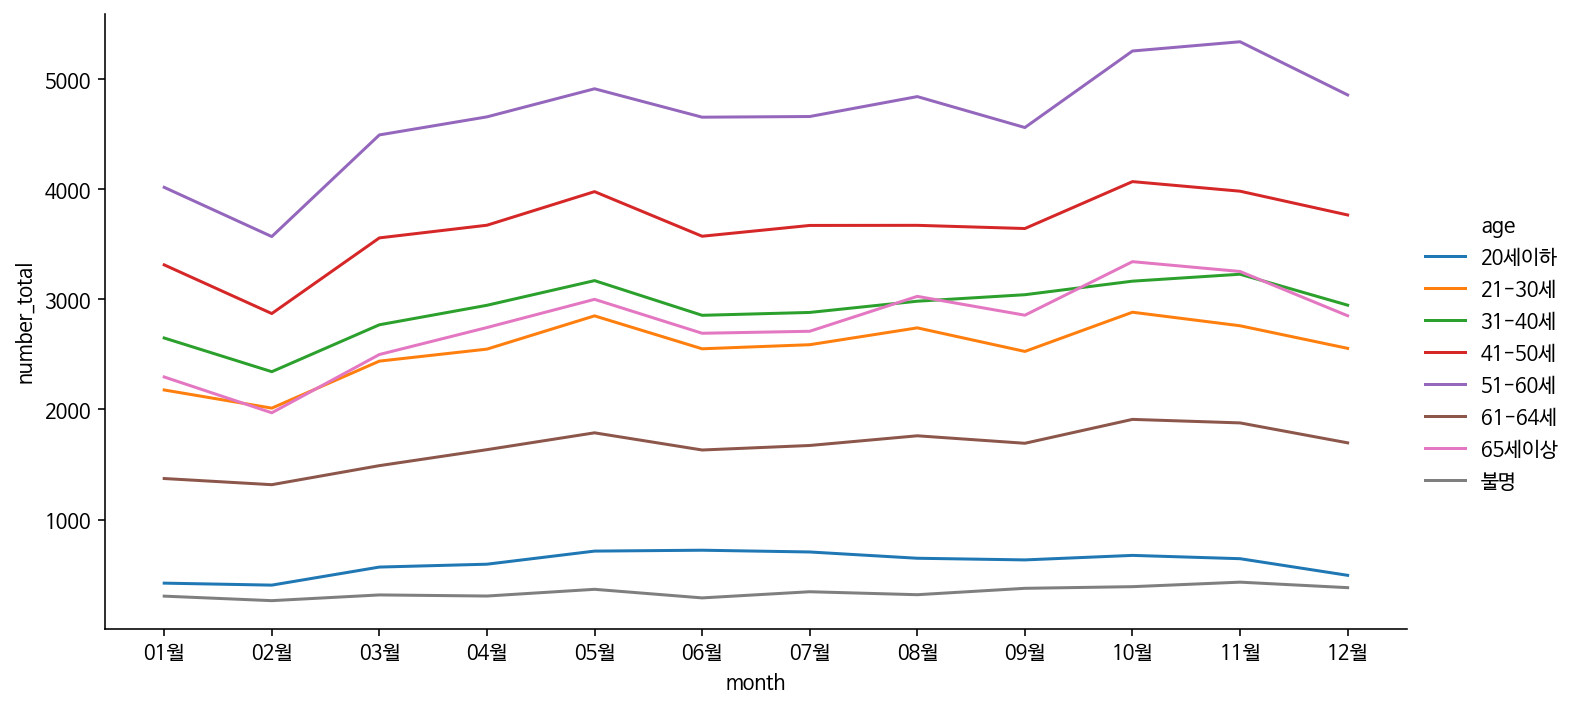

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt


import seaborn as sns
#plt.rc('font', family='Nanum')
#sns.set(style='whitegrid',
#        font="")

plt.figure(figsize=(20,4))
sns.relplot(x='month',y='number_total',
            hue='age', aspect=2,
            kind='line',data=a);

## 인터랙티브 데이터 시각화

In [19]:
a

,age,month,number_total,number_death
0,20세이하,01월,423,10
1,20세이하,02월,405,6
2,20세이하,03월,569,13
3,20세이하,04월,595,11
4,20세이하,05월,714,9
...,...,...,...,...
91,불명,08월,318,0
92,불명,09월,376,0
93,불명,10월,391,0
94,불명,11월,432,0


In [82]:
b = a['age'].isin(['20세이하'])
a1 = a[b]
b = a['age'].isin(['21-30세'])
a2 = a[b]
b = a['age'].isin(['31-40세'])
a3 = a[b]
b = a['age'].isin(['41-50세'])
a4 = a[b]
b = a['age'].isin(['51-60세'])
a5 = a[b]
b = a['age'].isin(['61-64세'])
a6 = a[b]
b = a['age'].isin(['65세이상'])
a7 = a[b]
b = a['age'].isin(['불명'])
a8 = a[b]
a3.number_total

24    2649
25    2343
26    2769
27    2946
28    3170
29    2855
30    2881
31    2983
32    3042
33    3165
34    3228
35    2947
Name: number_total, dtype: int64

In [64]:
c = a.month.drop_duplicates()
c

0     01월
1     02월
2     03월
3     04월
4     05월
5     06월
6     07월
7     08월
8     09월
9     10월
10    11월
11    12월
Name: month, dtype: object

In [90]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, show
output_notebook()
from bokeh.models import ColumnDataSource

source = ColumnDataSource(data=dict(
    y = [1,2,3,4,5,6,7,8,9,10,11,12],
    x1 = a1.number_total,
    x2 = a2.number_total,
    x3 = a3.number_total,
    x4 = a4.number_total,
    x5 = a5.number_total,
    x6 = a6.number_total,
    x7 = a7.number_total,
    x8 = a8.number_total
))

p = figure(plot_width=800,plot_height=400)
p.hbar_stack(['x1','x2','x3','x4','x5','x6','x7','x8'],y='y',height=0.8,color=('red','orange','yellow','green','skyblue','darkblue','purple','black'),source=source)
show(p)
#월별 및 나이대별 스택막대